# 06장 학습 모델 보기/저장하기/불러오기

## 1. 간단한 모델 살펴보기

In [19]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax

In [20]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [21]:
x_train = x_train.reshape(60000, 28*28).astype('float32')/255.0
x_test = x_test.reshape(10000, 28*28).astype('float32')/255.0

In [22]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [23]:
#검증 30%
x_val = x_train[:42000]
x_train = x_train[42000:] 
y_val = y_train[:42000]
y_train = y_train[42000:] 

In [24]:
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [26]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

Train on 18000 samples, validate on 42000 samples
Epoch 1/5
18000/18000 [==============================] - 2s 114us/step - loss: 1.1838 - acc: 0.6993 - val_loss: 0.6721 - val_acc: 0.8362
Epoch 2/5
18000/18000 [==============================] - 2s 109us/step - loss: 0.5256 - acc: 0.8646 - val_loss: 0.4820 - val_acc: 0.8701
Epoch 3/5
18000/18000 [==============================] - 2s 107us/step - loss: 0.4167 - acc: 0.8856 - val_loss: 0.4173 - val_acc: 0.8861
Epoch 4/5
18000/18000 [==============================] - 2s 107us/step - loss: 0.3699 - acc: 0.8965 - val_loss: 0.3822 - val_acc: 0.8923
Epoch 5/5
18000/18000 [==============================] - 2s 107us/step - loss: 0.3420 - acc: 0.9033 - val_loss: 0.3667 - val_acc: 0.8959


- 모델 평가하기

In [27]:
loss_and_matrics = model.evaluate(x_test, y_test, batch_size=32)

10000/10000 [==============================] - 0s 27us/step


In [28]:
loss_and_matrics

[0.33997456184029579, 0.90449999999999997]

- 모델 사용하기 

In [29]:
xhat_idx = np.random.choice(x_test.shape[0], 5)
xhat = x_test[xhat_idx]
yhat = model.predict_classes(xhat)

5/5 [==============================] - 0s 5ms/step


In [30]:
y=y_test[xhat_idx]
argmax(y, axis=1)

array([7, 5, 6, 8, 3])

In [31]:
yhat

array([7, 5, 6, 8, 3])

### 학습 네트워크 및 저장

In [32]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터셋 전처리
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

# 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 훈련셋과 검증셋 분리
x_val = x_train[:42000] # 훈련셋의 30%를 검증셋으로 사용
x_train = x_train[42000:]
y_val = y_train[:42000] # 훈련셋의 30%를 검증셋으로 사용
y_train = y_train[42000:]

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_val, y_val))

# 5. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

# 6. 모델 저장하기
from keras.models import load_model
model.save('mnist_mlp_model_206.h5')


Train on 18000 samples, validate on 42000 samples
Epoch 1/5
18000/18000 [==============================] - 2s 112us/step - loss: 1.1498 - acc: 0.7092 - val_loss: 0.6615 - val_acc: 0.8341
Epoch 2/5
18000/18000 [==============================] - 2s 106us/step - loss: 0.5206 - acc: 0.8664 - val_loss: 0.4788 - val_acc: 0.8723
Epoch 3/5
18000/18000 [==============================] - 2s 106us/step - loss: 0.4147 - acc: 0.8881 - val_loss: 0.4144 - val_acc: 0.8873
Epoch 4/5
18000/18000 [==============================] - 3s 161us/step - loss: 0.3676 - acc: 0.8989 - val_loss: 0.3814 - val_acc: 0.8928
Epoch 5/5
10000/10000 [==============================] - 0s 26us/step

loss_and_metrics : [0.32975832873582839, 0.90780000000000005]


In [33]:
!ls

Part1-ch01.ipynb	     Part2.ipynb
Part2-ch04-earlystop.ipynb   graph
Part2-ch05-evaluation.ipynb  mnist_mlp_model.h5
Part2-ch06-model-save.ipynb  mnist_mlp_model_206.h5


### 학습 모델 로딩

In [34]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax

# 1. 실무에 사용할 데이터 준비하기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_test = np_utils.to_categorical(y_test)
xhat_idx = np.random.choice(x_test.shape[0], 5)
xhat = x_test[xhat_idx]

# 2. 모델 불러오기
from keras.models import load_model
model2 = load_model('mnist_mlp_model_206.h5')

# 3. 모델 사용하기
yhat = model2.predict_classes(xhat)

for i in range(5):
    print('True : ' + str(argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat[i]))


5/5 [==============================] - 0s 6ms/step
True : 8, Predict : 8
True : 9, Predict : 9
True : 1, Predict : 1
True : 1, Predict : 1
True : 1, Predict : 1


- 다시 학습 시키기

In [35]:
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
y_train = np_utils.to_categorical(y_train)
model2.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.3221 - acc: 0.9094
Epoch 2/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.2833 - acc: 0.9210
Epoch 3/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.2577 - acc: 0.9279
Epoch 4/5
60000/60000 [==============================] - 3s 53us/step - loss: 0.2383 - acc: 0.9336
Epoch 5/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.2226 - acc: 0.9380


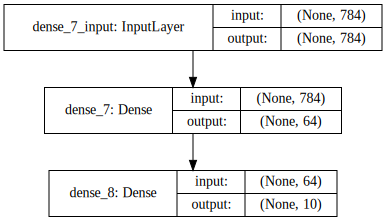

In [40]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model2, show_shapes=True).create(prog='dot', format='svg'))

### model 저장 방법

In [37]:
from keras.models import model_from_json
json_string = model.to_json()

In [38]:
json_string

'{"keras_version": "2.0.9", "backend": "tensorflow", "config": [{"config": {"bias_initializer": {"config": {}, "class_name": "Zeros"}, "name": "dense_7", "use_bias": true, "kernel_initializer": {"config": {"mode": "fan_avg", "scale": 1.0, "distribution": "uniform", "seed": null}, "class_name": "VarianceScaling"}, "activity_regularizer": null, "batch_input_shape": [null, 784], "bias_constraint": null, "units": 64, "trainable": true, "dtype": "float32", "bias_regularizer": null, "kernel_regularizer": null, "kernel_constraint": null, "activation": "relu"}, "class_name": "Dense"}, {"config": {"bias_initializer": {"config": {}, "class_name": "Zeros"}, "name": "dense_8", "use_bias": true, "kernel_initializer": {"config": {"mode": "fan_avg", "scale": 1.0, "distribution": "uniform", "seed": null}, "class_name": "VarianceScaling"}, "activity_regularizer": null, "bias_constraint": null, "units": 10, "trainable": true, "bias_regularizer": null, "kernel_regularizer": null, "kernel_constraint": nul

In [39]:
model_from_json = model_from_json(json_string)

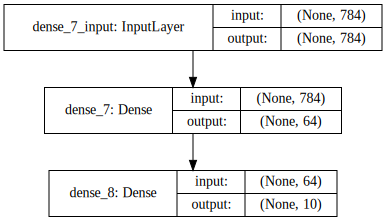

In [41]:
SVG(model_to_dot(model_from_json, show_shapes=True).create(prog='dot', format='svg'))